In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


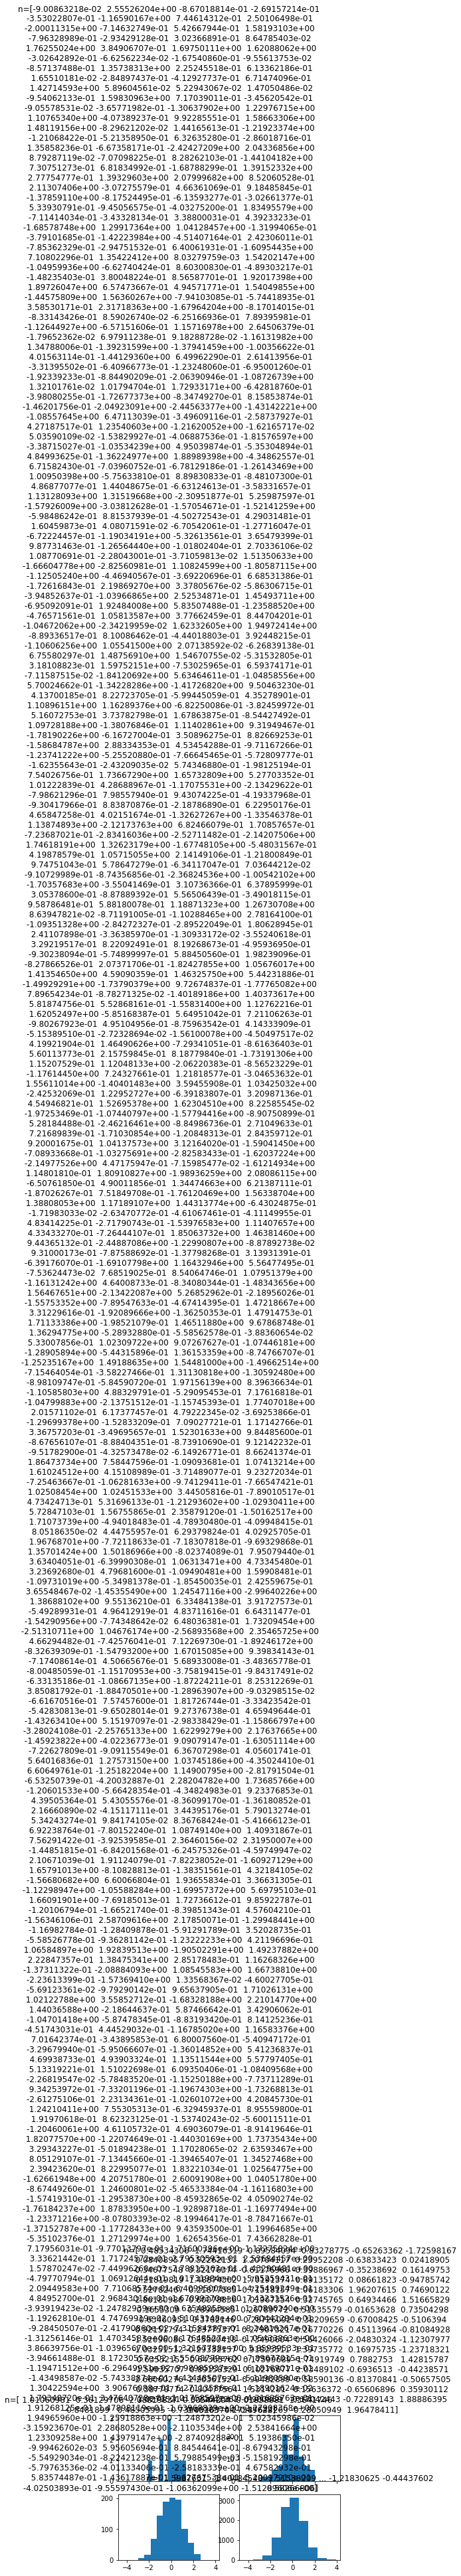

In [2]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, sharex= True)
axs = [ax1, ax2, ax3, ax4]

for n in range(0, len(axs)):
    sample_size = 10**(n+1)
    sample = np.random.normal(loc=0.0, scale = 1.0, size = sample_size)
    axs[n].hist(sample)
    axs[n].set_title(f'n={sample}')
    
    

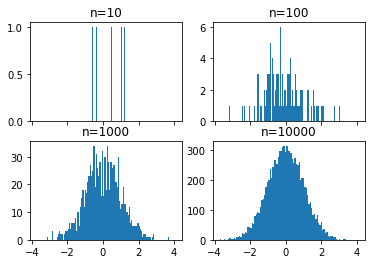

In [6]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, sharex = True)

axs = [ax1, ax2, ax3, ax4]
for n in range(0, len(axs)):
    sample_size = 10**(n+1)
    sample = np.random.normal(loc=0.0, scale = 1.0, size = sample_size)
    axs[n].hist(sample, bins = 100)
    axs[n].set_title(f'n={sample_size}')
    